In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Daily_Water_Intake.csv')

In [3]:
df.head()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
0,56,Male,96,4.23,Moderate,Hot,Good
1,60,Male,105,3.95,High,Normal,Good
2,36,Male,68,2.39,Moderate,Cold,Good
3,19,Female,74,3.13,Moderate,Hot,Good
4,38,Male,77,2.11,Low,Normal,Poor


In [4]:
df.tail()

,Age,Gender,Weight (kg),Daily Water Intake (liters),Physical Activity Level,Weather,Hydration Level
29995,47,Male,97,3.45,Moderate,Cold,Good
29996,49,Female,109,5.32,High,Hot,Good
29997,56,Female,54,1.50,Moderate,Cold,Poor
29998,36,Male,106,4.00,Low,Hot,Good
29999,26,Female,98,4.43,Moderate,Hot,Good


In [5]:
df.isna().sum()

,0
Age,0
Gender,0
Weight (kg),0
Daily Water Intake (liters),0
Physical Activity Level,0
Weather,0
Hydration Level,0


In [6]:
df.duplicated().sum()

np.int64(338)

In [9]:
df.shape


(30000, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


In [11]:
df['Hydration Level'].value_counts()

,count
Hydration Level,
Good,23915
Poor,6085


In [13]:
df['Hydration Level'].unique()

array(['Good', 'Poor'], dtype=object)

<Axes: xlabel='Hydration Level', ylabel='count'>

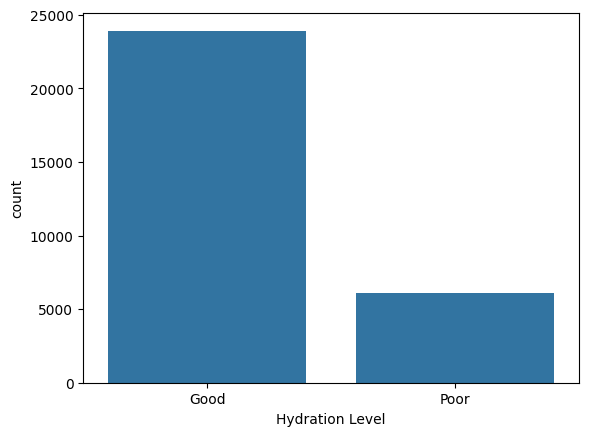

In [15]:
sns.countplot(x=df['Hydration Level'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  object 
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  object 
 5   Weather                      30000 non-null  object 
 6   Hydration Level              30000 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.6+ MB


<Axes: xlabel='Daily Water Intake (liters)', ylabel='count'>

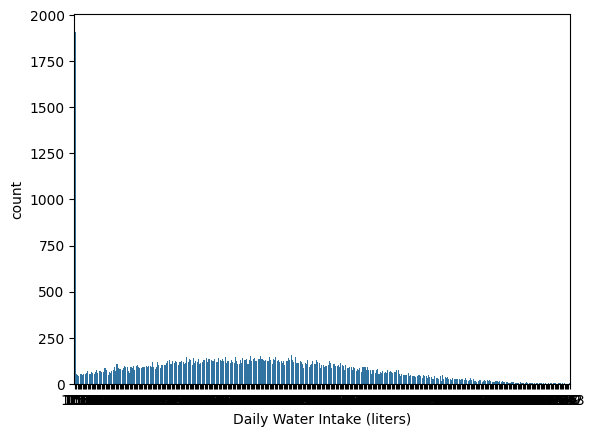

In [19]:
sns.countplot(x=df['Daily Water Intake (liters)'])

<Axes: xlabel='Weather', ylabel='Age'>

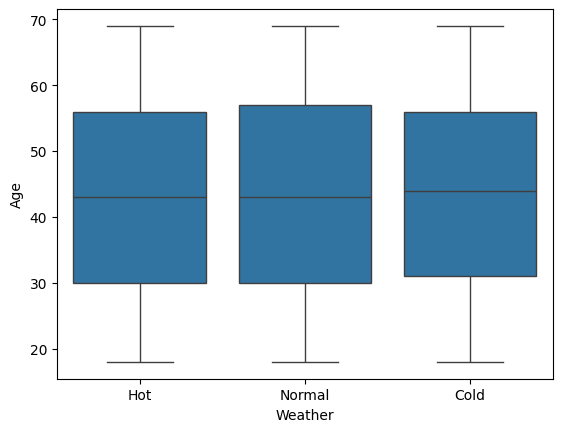

In [21]:
sns.boxplot(y=df['Age'],x=df['Weather'],data=df)

<Axes: xlabel='Age', ylabel='Daily Water Intake (liters)'>

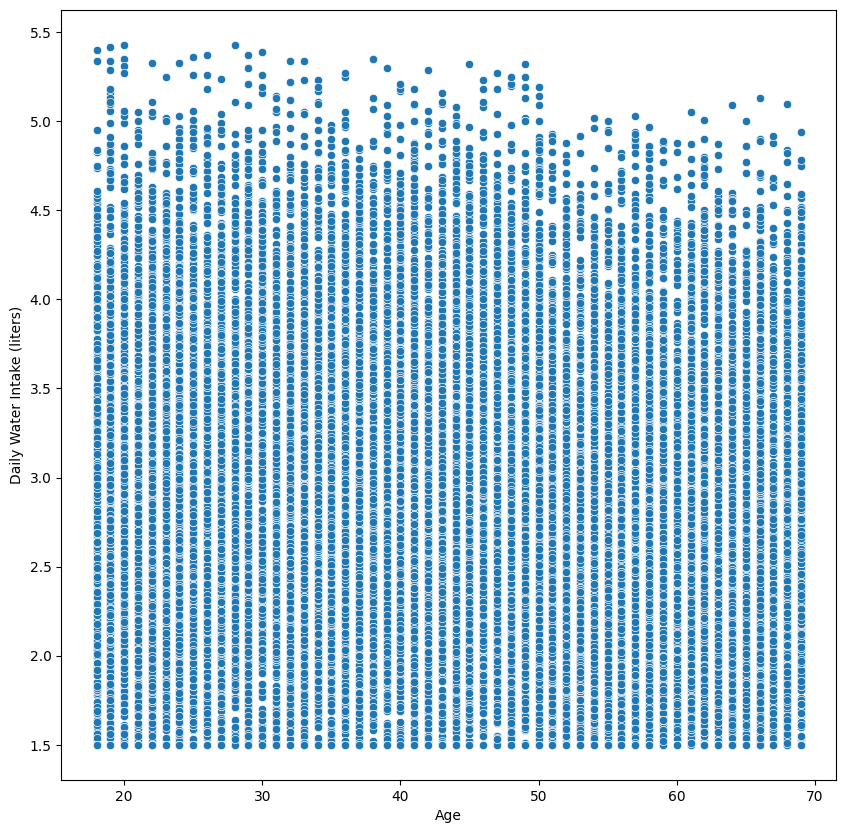

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=df['Daily Water Intake (liters)'],x=df['Age'])

<Axes: xlabel='Daily Water Intake (liters)', ylabel='Count'>

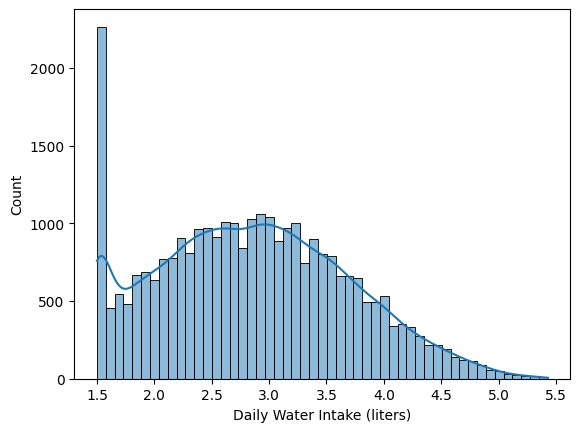

In [29]:
sns.histplot(x=df['Daily Water Intake (liters)'],kde=True)

In [45]:
X=df.drop(['Daily Water Intake (liters)'],axis=1)
y=df['Daily Water Intake (liters)']

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['Gender','Physical Activity Level','Weather','Hydration Level']
for i in col:
    df[i]=le.fit_transform(df[i])


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          30000 non-null  int64  
 1   Gender                       30000 non-null  int64  
 2   Weight (kg)                  30000 non-null  int64  
 3   Daily Water Intake (liters)  30000 non-null  float64
 4   Physical Activity Level      30000 non-null  int64  
 5   Weather                      30000 non-null  int64  
 6   Hydration Level              30000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.6 MB


In [48]:
from sklearn.model_selection  import train_test_split
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [49]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test= scaler.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [58]:
y_pred=model.predict(X_test)
y_pred

array([2.56160746, 3.44616004, 2.32275192, ..., 1.28019399, 1.14365317,
       3.49069228])

In [60]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2 Score: 0.7176034483459321
MAE: 0.3556516692733983
RMSE: 0.44009767499476377


In [61]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [63]:
y_pred=model.predict(X_test)
y_pred

array([2.37146667, 4.06145   , 2.16180833, ..., 1.5002    , 1.5402    ,
       4.44548333])

In [64]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2 Score: 0.8854123531167815
MAE: 0.22289490098665227
RMSE: 0.28034207281002765


In [65]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(X_train,y_train)

DecisionTreeRegressor()

In [66]:
y_pred=model.predict(X_test)
y_pred

array([2.37146667, 4.06145   , 2.16180833, ..., 1.5002    , 1.5402    ,
       4.44548333])

In [67]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R2 Score: 0.8854123531167815
MAE: 0.22289490098665227
RMSE: 0.28034207281002765


In [74]:
import  pickle as pk
pk.dump(model,open('model.pkl','wb'))